In [28]:

from datetime import datetime  
import pandas as pd
import matplotlib.pyplot as plt 
import platform 
if platform.system() == 'Darwin':
    plt.rc('font', family = 'AppleGothic')
else:
    plt.rc('font', family = 'Malgun Gothic')

- 온라인, 오프라인 카드 사용 내역 데이터를 확인
    1. csv폴더 안에 있는 오프라인.csv, 온라인.csv 파일 로드
    2. 두개의 데이터프레임을 단순한 행 결합(유니온 결합)
        - 두개의 데이터프레임의 구조 파악
        - 두개의 데이터프레임의 구조를 같은 형태로 변환
        - 유니온 결합
    3. 기준년월 컬럼의 데이터를 시계열데이터로 변경
    4. 기준년월, 업종별 총이용금액의 합계를 그래프 표시

In [11]:
offline = pd.read_csv('../../csv/card/오프라인.csv', encoding = 'CP949')
online = pd.read_csv('../../csv/card/온라인.csv')

In [65]:
offline.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2648 entries, 0 to 2647
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   기준년월    2648 non-null   int64  
 1   업종      2648 non-null   object 
 2   성별      2648 non-null   int64  
 3   연령대     2648 non-null   int64  
 4   총이용건수   2648 non-null   int64  
 5   총이용금액   2648 non-null   float64
dtypes: float64(1), int64(4), object(1)
memory usage: 124.3+ KB


In [14]:
online.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 651 entries, 0 to 650
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   crym          651 non-null    int64
 1   ma_fem_dc     651 non-null    int64
 2   agegrp_dc     651 non-null    int64
 3   tco_btc_u_ct  651 non-null    int64
 4   tco_btc_u_am  651 non-null    int64
dtypes: int64(5)
memory usage: 25.6 KB


In [15]:
## 컬럼의 이름 변경
offline.columns = ['기준년월', '업종', '성별', '연령대', '총이용건수', '총이용금액']
offline.head(3)

,기준년월,업종,성별,연령대,총이용건수,총이용금액
0,201901,백화점,1,1,1,7.600000e+03
1,201901,백화점,1,10,379,1.945872e+07
2,201901,백화점,1,20,45173,4.747711e+09


In [16]:
online.columns = ['기준년월', '성별', '연령대', '총이용건수', '총이용금액']
online.head(3)

,기준년월,성별,연령대,총이용건수,총이용금액
0,201901,1,1,1,110685
1,201901,1,10,2333,98108225
2,201901,1,20,272915,13854081656


In [17]:
## online 데이터프레임에 업종 컬럼을 추가 -> 데이터 '온라인'
online['업종'] = '온라인'

In [19]:
online['업종'].value_counts()             # 다 온라인으로 들어갔는 지 확인

업종
온라인    651
Name: count, dtype: int64

In [20]:
offline.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2648 entries, 0 to 2647
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   기준년월    2648 non-null   int64  
 1   업종      2648 non-null   object 
 2   성별      2648 non-null   int64  
 3   연령대     2648 non-null   int64  
 4   총이용건수   2648 non-null   int64  
 5   총이용금액   2648 non-null   float64
dtypes: float64(1), int64(4), object(1)
memory usage: 124.3+ KB


In [21]:
online.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 651 entries, 0 to 650
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   기준년월    651 non-null    int64 
 1   성별      651 non-null    int64 
 2   연령대     651 non-null    int64 
 3   총이용건수   651 non-null    int64 
 4   총이용금액   651 non-null    int64 
 5   업종      651 non-null    object
dtypes: int64(5), object(1)
memory usage: 30.6+ KB


In [26]:
df = pd.concat([offline, online], axis = 0 , ignore_index= True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3299 entries, 0 to 3298
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   기준년월    3299 non-null   int64  
 1   업종      3299 non-null   object 
 2   성별      3299 non-null   int64  
 3   연령대     3299 non-null   int64  
 4   총이용건수   3299 non-null   int64  
 5   총이용금액   3299 non-null   float64
dtypes: float64(1), int64(4), object(1)
memory usage: 154.8+ KB


In [37]:
## 기준년월 데이터를 시계열 변경
df['기준년월'] = pd.to_datetime(df['기준년월'], format = "%Y%m")
df.head()

,기준년월,업종,성별,연령대,총이용건수,총이용금액
0,2019-01-01,백화점,1,1,1,7.600000e+03
1,2019-01-01,백화점,1,10,379,1.945872e+07
2,2019-01-01,백화점,1,20,45173,4.747711e+09
3,2019-01-01,백화점,1,30,271858,2.791826e+10
4,2019-01-01,백화점,1,40,391109,3.791149e+10


In [41]:
## 성별 컬럼의 데이터를 1은 남자 2는 여자로 변경                  방법3 for문 series.map() series.replace()
df2 = df.copy()

In [66]:
# replace()
df2['성별'].replace(
    {
        1: '남자',
        2: '여자',
        9: '무관'
     }   
)

0       남자
1       남자
2       남자
3       남자
4       남자
        ..
3294    여자
3295    여자
3296    여자
3297    여자
3298    여자
Name: 성별, Length: 3299, dtype: object

In [67]:
# map() + (일반함수 | lambda함수)                            map()의 매개변수는 하나
def change(x): 
    # x에 입력되는 데이터들은 1, 2                       확인했으니 1,2 만 있지만 다른 data에서는 1,2,9,- 확인해야한다.
    # x가 만약에 1이라면 -> '남자' 되돌려준다.
    if x == 1:
        return '남자'
    elif x == 2:
        return '여자'
    
df2['성별'].map(change)

0       None
1       None
2       None
3       None
4       None
        ... 
3294    None
3295    None
3296    None
3297    None
3298    None
Name: 성별, Length: 3299, dtype: object

In [48]:
# if문을 한줄로 표시 : '조건식이 참인 경우 return 데이터' if (조건식) else '거짓인 경우 return 데이터'
df['성별'] = df['성별'].map(
    lambda x : '남자' if(x == 1) else ('여자' if (x == 2) else '무관')
)

In [54]:
# for문 
res = []
for i in df2['성별']:
    if i == 1:
        res.append('남자')
    elif i == 2:
        res.append('여자')
    else:
        res.append('무관')
df2['성별'] = res

['남자', '남자', '남자', '남자', '남자', '남자', '남자', '남자', '남자', '남자', '여자', '여자', '여자', '여자', '여자', '여자', '여자', '여자', '여자', '여자', '여자', '남자', '남자', '남자', '남자', '남자', '남자', '남자', '남자', '남자', '남자', '여자', '여자', '여자', '여자', '여자', '여자', '여자', '여자', '여자', '여자', '남자', '남자', '남자', '남자', '남자', '남자', '남자', '남자', '남자', '남자', '여자', '여자', '여자', '여자', '여자', '여자', '여자', '여자', '여자', '여자', '여자', '남자', '남자', '남자', '남자', '남자', '남자', '남자', '남자', '남자', '여자', '여자', '여자', '여자', '여자', '여자', '여자', '여자', '여자', '여자', '여자', '남자', '남자', '남자', '남자', '남자', '남자', '남자', '남자', '남자', '여자', '여자', '여자', '여자', '여자', '여자', '여자', '여자', '여자', '여자', '남자', '남자', '남자', '남자', '남자', '남자', '남자', '남자', '남자', '여자', '여자', '여자', '여자', '여자', '여자', '여자', '여자', '여자', '남자', '남자', '남자', '남자', '남자', '남자', '남자', '남자', '남자', '여자', '여자', '여자', '여자', '여자', '여자', '여자', '여자', '여자', '여자', '남자', '남자', '남자', '남자', '남자', '남자', '남자', '남자', '남자', '여자', '여자', '여자', '여자', '여자', '여자', '여자', '여자', '여자', '여자', '남자', '남자', '남자', '남자', '남자', '남자', '남자', '남자', '남자', '여자

In [58]:
for i in range(len(df2['성별'])):
    data = df2['성별'][i] 
    if data == 1:                      # df2.loc[i, '성별']
        df2.loc[i, '성별'] = '남자'
    elif data == 2:
        df2.loc[i, '성별'] = '여자'
    else: 
        df2.loc[i, '성별'] = '무관'                                  

C:\Users\Jws\AppData\Local\Temp\ipykernel_2200\3937326868.py:4: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '남자' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df2.loc[i, '성별'] = '남자'


In [68]:
df2['성별'].value_counts()

성별
여자    1661
남자    1638
Name: count, dtype: int64

In [ ]:
## pandas에서 지수표현식을 없애기
pd.options.display.float_format = '{:2f}'.format
df

<Axes: xlabel='기준년월'>

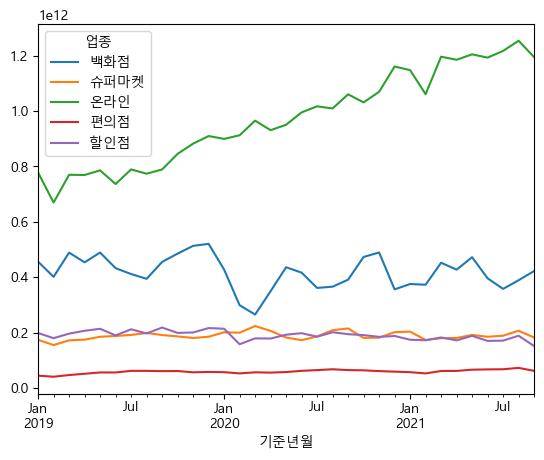

In [40]:
df.pivot_table(
    index = '기준년월',
    columns = '업종',
    values = '총이용금액',
    aggfunc = 'sum'
).plot()

In [73]:
## 기준년월, 업종별 총이용금액의 합계 그래프 표시 
group_data = df[['기준년월','업종', '총이용금액']].groupby(['기준년월','업종']).sum()
group_data                                                     # dataframe 형태로 출력

총이용금액
기준년월       업종                
2019-01-01 백화점   4.558955e+11
           슈퍼마켓  1.736131e+11
           온라인   7.782817e+11
           편의점   4.408358e+10
           할인점   1.981718e+11
...                       ...
2021-09-01 백화점   4.220812e+11
           슈퍼마켓  1.818095e+11
           온라인   1.195275e+12
           편의점   6.136282e+10
           할인점   1.510796e+11

[165 rows x 1 columns]

In [76]:
group_data2 = df.groupby(['기준년월', '업종']).sum()['총이용금액']
group_data2                                              # 시리즈 형태로 출력

기준년월        업종  
2019-01-01  백화점     4.558955e+11
            슈퍼마켓    1.736131e+11
            온라인     7.782817e+11
            편의점     4.408358e+10
            할인점     1.981718e+11
                        ...     
2021-09-01  백화점     4.220812e+11
            슈퍼마켓    1.818095e+11
            온라인     1.195275e+12
            편의점     6.136282e+10
            할인점     1.510796e+11
Name: 총이용금액, Length: 165, dtype: float64

In [79]:
group_data2.unstack()

업종,백화점,슈퍼마켓,온라인,편의점,할인점
기준년월,,,,,
2019-01-01,4.558955e+11,1.736131e+11,7.782817e+11,4.408358e+10,1.981718e+11
2019-02-01,4.011916e+11,1.546390e+11,6.696276e+11,4.019682e+10,1.795704e+11
2019-03-01,4.886521e+11,1.717930e+11,7.699826e+11,4.634686e+10,1.959683e+11
2019-04-01,4.536723e+11,1.741783e+11,7.693437e+11,5.093585e+10,2.062539e+11
2019-05-01,4.890036e+11,1.846895e+11,7.858765e+11,5.569127e+10,2.134109e+11
2019-06-01,4.325099e+11,1.874238e+11,7.366348e+11,5.559312e+10,1.895914e+11
2019-07-01,4.113440e+11,1.912817e+11,7.894194e+11,6.148315e+10,2.116533e+11
2019-08-01,3.939827e+11,1.983115e+11,7.739429e+11,6.140625e+10,1.966998e+11
2019-09-01,4.550747e+11,1.908706e+11,7.892287e+11,6.042129e+10,2.179884e+11


<Axes: xlabel='기준년월'>

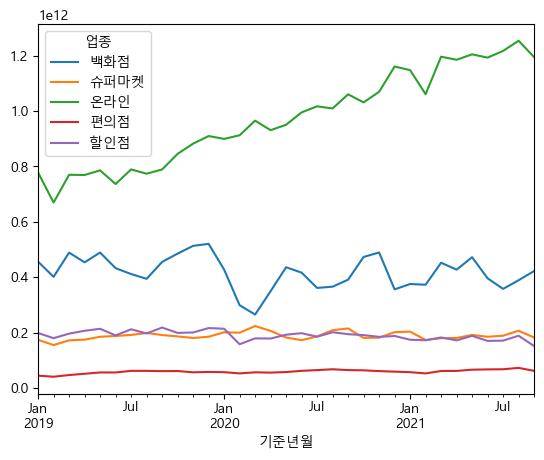

In [80]:
group_data2.unstack().plot()

In [81]:
## 기준년월 별 합산 데이터를 확인 
# groupby()로
group_data3 = group_data2.unstack()

In [ ]:
group_data3.sum()              # col별로 합쳐진다.

In [84]:
group_data3.sum(axis = 1)

기준년월
2019-01-01    1.650046e+12
2019-02-01    1.445225e+12
2019-03-01    1.672743e+12
2019-04-01    1.654384e+12
2019-05-01    1.728672e+12
2019-06-01    1.601753e+12
2019-07-01    1.665182e+12
2019-08-01    1.624343e+12
2019-09-01    1.713584e+12
2019-10-01    1.776171e+12
2019-11-01    1.832368e+12
2019-12-01    1.888906e+12
2020-01-01    1.798582e+12
2020-02-01    1.620908e+12
2020-03-01    1.688856e+12
2020-04-01    1.719778e+12
2020-05-01    1.817953e+12
2020-06-01    1.843288e+12
2020-07-01    1.813314e+12
2020-08-01    1.851906e+12
2020-09-01    1.924738e+12
2020-10-01    1.939226e+12
2020-11-01    1.985453e+12
2020-12-01    1.964517e+12
2021-01-01    1.957304e+12
2021-02-01    1.831187e+12
2021-03-01    2.071524e+12
2021-04-01    2.026037e+12
2021-05-01    2.122234e+12
2021-06-01    2.010233e+12
2021-07-01    2.001748e+12
2021-08-01    2.110522e+12
2021-09-01    2.011608e+12
dtype: float64

<Axes: xlabel='기준년월'>

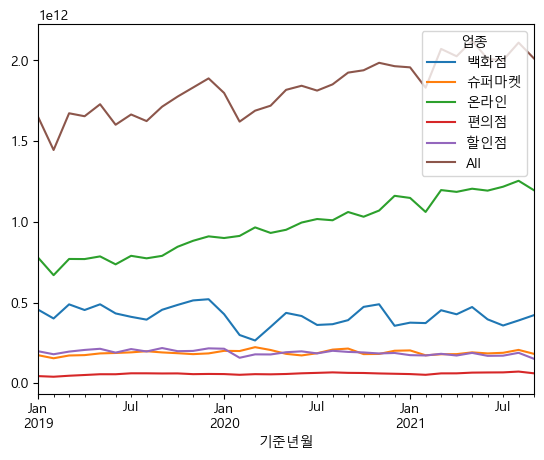

In [85]:
group_data3['All'] = group_data3.sum(axis = 1)
group_data3.plot()

In [88]:
# pivot_table로
pivot_data = df.pivot_table(
    index = '기준년월',
    columns = '업종',
    values = '총이용금액',
    aggfunc = 'sum',
    margins = True                  # 합산 만들기
)
pivot_data

업종,백화점,슈퍼마켓,온라인,편의점,할인점,All
기준년월,,,,,,
2019-01-01 00:00:00,4.558955e+11,1.736131e+11,7.782817e+11,4.408358e+10,1.981718e+11,1.650046e+12
2019-02-01 00:00:00,4.011916e+11,1.546390e+11,6.696276e+11,4.019682e+10,1.795704e+11,1.445225e+12
2019-03-01 00:00:00,4.886521e+11,1.717930e+11,7.699826e+11,4.634686e+10,1.959683e+11,1.672743e+12
2019-04-01 00:00:00,4.536723e+11,1.741783e+11,7.693437e+11,5.093585e+10,2.062539e+11,1.654384e+12
2019-05-01 00:00:00,4.890036e+11,1.846895e+11,7.858765e+11,5.569127e+10,2.134109e+11,1.728672e+12
2019-06-01 00:00:00,4.325099e+11,1.874238e+11,7.366348e+11,5.559312e+10,1.895914e+11,1.601753e+12
2019-07-01 00:00:00,4.113440e+11,1.912817e+11,7.894194e+11,6.148315e+10,2.116533e+11,1.665182e+12
2019-08-01 00:00:00,3.939827e+11,1.983115e+11,7.739429e+11,6.140625e+10,1.966998e+11,1.624343e+12
2019-09-01 00:00:00,4.550747e+11,1.908706e+11,7.892287e+11,6.042129e+10,2.179884e+11,1.713584e+12


<Axes: xlabel='기준년월'>

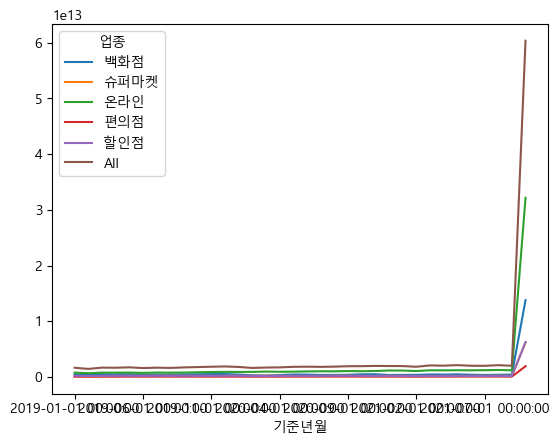

In [91]:
pivot_data.plot()

<Axes: xlabel='기준년월'>

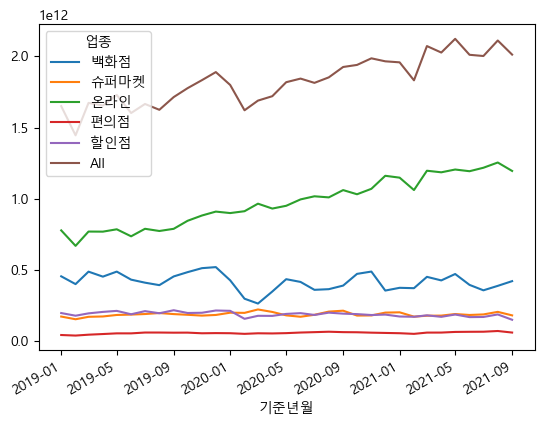

In [93]:
pivot_data.drop('All', axis = 0).plot()

<Axes: xlabel='기준년월'>

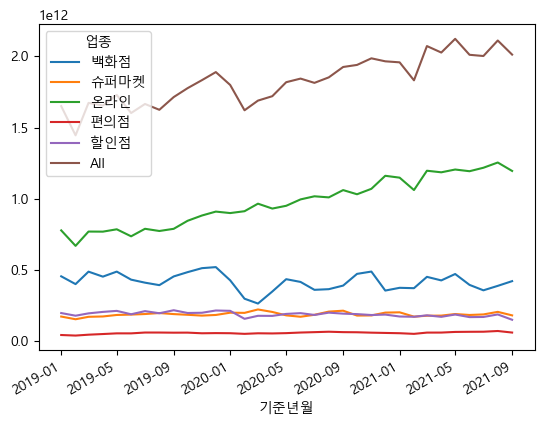

In [96]:
pivot_data.iloc[:-1].plot()

<Axes: xlabel='기준년월'>

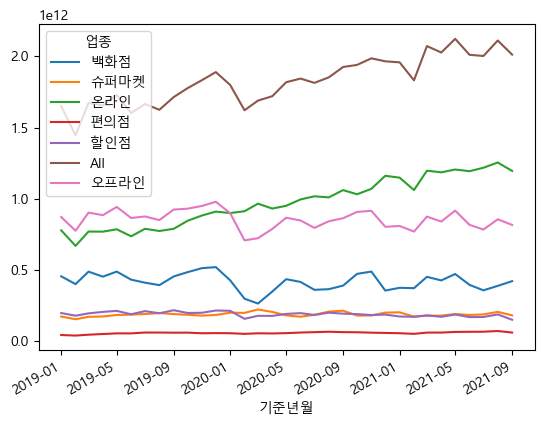

In [99]:
pivot_data['오프라인'] = pivot_data['All'] - pivot_data['온라인']
pivot_data.iloc[:-1].plot()

In [100]:
data = pivot_data.iloc[:-1]

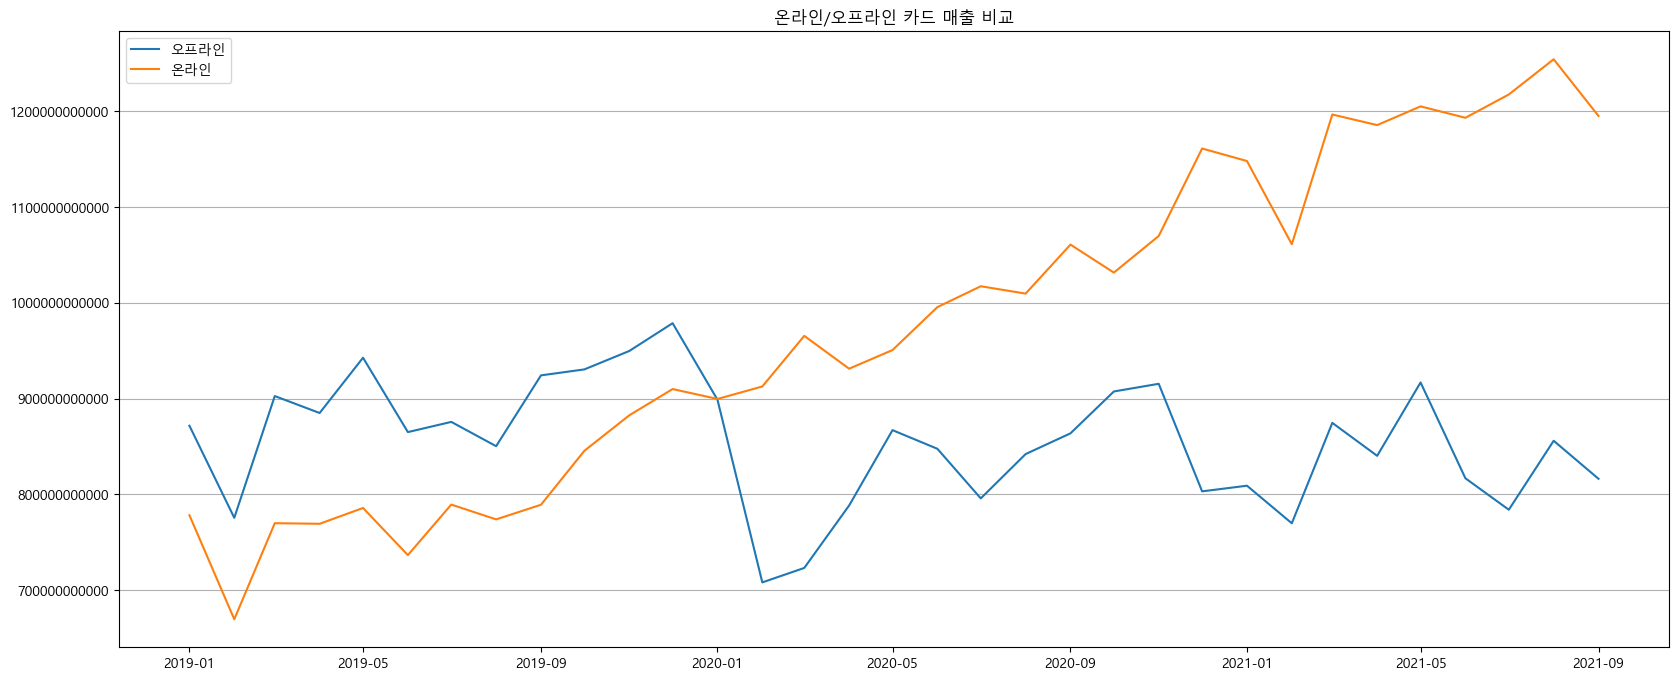

In [107]:
x = data.index
y1 = data['오프라인']
y2 = data['온라인']

# 그래프의 사이즈를 변경
plt.figure(figsize = (20,8))

# 그래프에서 지수표현식 제거
plt.ticklabel_format(axis = 'y', style = 'plain')

# y축에 그리드 선을 추가
plt.grid(True, axis = 'y')

plt.plot(x, y1, label = '오프라인')
plt.plot(x, y2, label = '온라인')

# 그래프의 제목 추가 
plt.title("온라인/오프라인 카드 매출 비교")

# 그래프의 범례 추가
plt.legend()
plt.show()